## Introduction
We will be work on both single and multiple linear regression using the Scikit-Learn library and we will show how to assess the quality of the parameters and the overall model in both situations.
### Dataset description
The dataset contains information about the money spent on television, radio and newspaper advertising, as well as the sales generated.
### Goal
The goal is to use linear regression to understand the impact of ad spend on sales.

### Libraries we use!


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

### Loading dataset
I have placed the data in a github directory in csv format. Then access will be via the https protocol.

In [ ]:
data = pd.read_csv(
    "https://raw.githubusercontent.com/saidRaiss/dataset/master/advertising_ads"
  )

To discover the dataset for the first time, the **info()** method is useful for getting an overview: number of data, number of columns, column names and column data types.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


### Visualization

In [ ]:
data.head() # Display first five values (default)
# Or use the sample(n) method to display n random values.

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


As you can see, the **Unnamed: 0** column is redundant. Therefore, we are removing it.

In [ ]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)
# axis=1 it indicates that it is a column (axis=0 for index).
# inplace=True it indicates that the modification made to the data variable.

Now let's show some dataset values

In [ ]:
data.sample(5)

,TV,radio,newspaper,sales
181,218.5,5.4,27.4,12.2
135,48.3,47.0,8.5,11.6
170,50.0,11.6,18.4,8.4
80,76.4,26.7,22.3,11.8
25,262.9,3.5,19.5,12.0


### Correlation between variables
The statistical relationship between two variables is called their correlation. A correlation can be positive (<= 1), which means that the two variables move in the same direction, or negative (> = - 1), which means that when the value of one variable increases, the values ​​of the others variables decrease (regression). If the correlation between two variables close to 0 then they are not correlated.

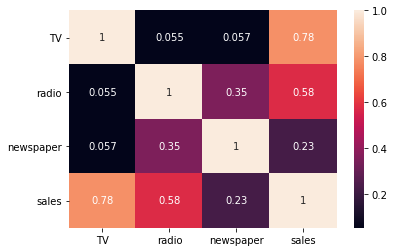

In [ ]:
correlation = data.corr()
# correlation plot
sns.heatmap(correlation, annot= True);

As you can see the **sales** output has a higher correlation with the **TV** variable than the **radio** variable and a non-correlation with the **newspaper** variable. Ultimately newspaper advertising does not matter much than TV or radio advertising, which should be shown in the following steps.

## Simple linear regression
For a simple linear regression, consider only the effect of TV ads on sales. Let's see what the data looks like before we jump straight to modeling.

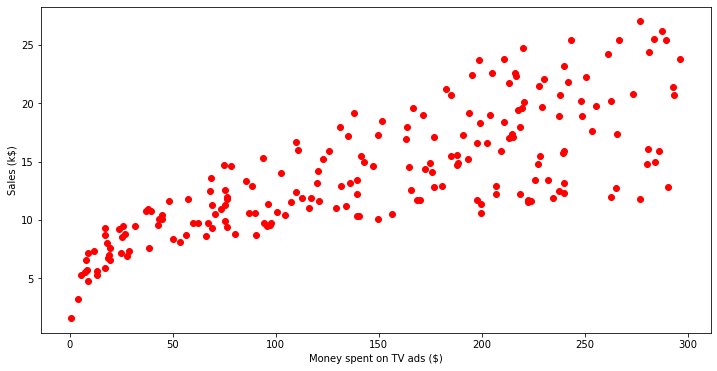

In [ ]:
# We use matplotlib, a popular Python plotting library, to create points.
plt.figure(figsize=(12, 6))
plt.scatter(
    data['TV'],
    data['sales'],
    c='red'
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales (k$)")
plt.show()

As you can see, there is a clear relationship between the amount spent on **TV** and **sales**. Let's see how we can generate a **linear approximation** of this data.

In [ ]:
# Input
X = data['TV'].values.reshape(-1, 1)
# Output
Y = data['sales'].values.reshape(-1, 1)
# Create a linear regression model
reg = LinearRegression()
# "fit" a data to train
reg.fit(X, Y)
print(
    "The linear model is: Y={:.5} + {:.5}X"
    .format(reg.intercept_[0], reg.coef_[0][0])
    )

The linear model is: Y=7.0326 + 0.047537X


So in this case Sales(k$) = 7.03 + 0.04 * TV. Now let's see how the row matches the data.

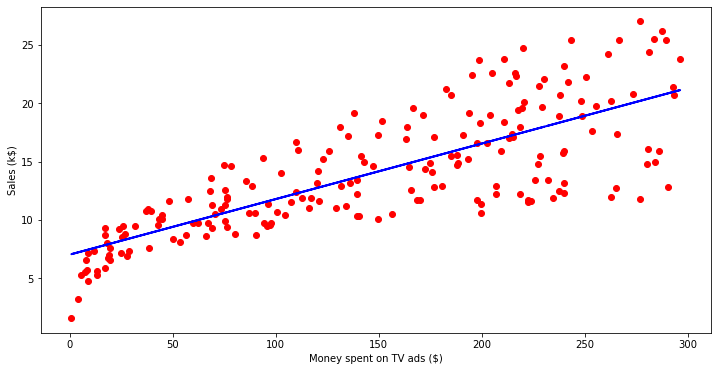

In [ ]:
predictions = reg.predict(X)
plt.figure(figsize=(12, 6))
plt.scatter(
    data['TV'],
    data['sales'],
    c='red'
)
plt.plot(
    data['TV'],
    predictions,
    c='blue',
    linewidth = 2
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales (k$)")
plt.show()

From the graph above, it seems that a simple linear regression can explain the relationship between the amount spent on TV and sales.

## Multiple linear regression
Like a simple linear regression, we will define the matrix of input variables (TV, radio, newspaper)  and the target variable (sales) and use the scikit-learn library to perform linear regression .

In [ ]:
Xm = data.drop(['sales'], axis=1)
Y = data['sales'].values.reshape(-1, 1)
reg = LinearRegression()
reg.fit(Xm, Y)
print(
    "The linear model is: Y={:.5} + {:.5}*TV + {:.5}*radio + {:.5}*newspaper"
    .format(
        reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1], reg.coef_[0][2]
        )
    )

The linear model is: Y=2.9389 + 0.045765*TV + 0.18853*radio + -0.0010375*newspaper


Note that the coefficient for the newspaper is negative, but also quite small. Is this enough for our model? Let's see by calculating the F-statistic, the R² value and p-value for each coefficient.



### Evaluate the accuracy of the model
To see if the model is good, we need to look at the F-static value, the R² value, and the p-value of each coefficient.

In [ ]:
X = np.column_stack((data['TV'], data['radio'], data['newspaper']))
Y = data['sales']
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 23 Oct 2020   Prob (F-statistic):           1.58e-96
Time:                        10:52:26   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

As we can see, the R² is quite close to 1, with a value of 0.897! Next, the value of F-static is 570.3 is far greater than 1, although our data set is quite small (only 200 data points), it shows that there is a strong relationship between ad spend and sales. Finally, since we only have three predictors, we can consider their p-values to determine whether they are relevant to the model or not. Of course, we notice that the third coefficient (that of the newspaper) has a large p-value. Therefore, newspaper ad spending is **not statistically significant**. **Removing this predictor would slightly reduce the R² value, but we could make better predictions.**